# K-Means

Finds a predetermined number of clusters in a dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs

sns.set()

N_clusters = 4
data_points = 300
cluster_std = .45

data, cluster = make_blobs(n_samples=data_points, centers=N_clusters,cluster_std=cluster_std)
# Here we generate the data and which cluster each data point belongs too

In [8]:
data[-5:]

array([[ -3.89803214,  -8.23168189],
       [ -6.40626534,   7.59489453],
       [ -4.48578309,  -8.15053275],
       [ -6.41552489,   6.55625444],
       [ -2.31962156, -10.07272359]])

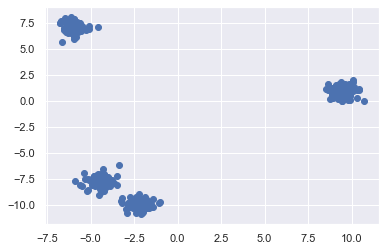

In [10]:
#Accesing a certain column of a numpy array can be done with the syntax
#array[:,n] for the nth column

fig, ax = plt.subplots()
ax.scatter(data[:,0],data[:,1])
plt.show()

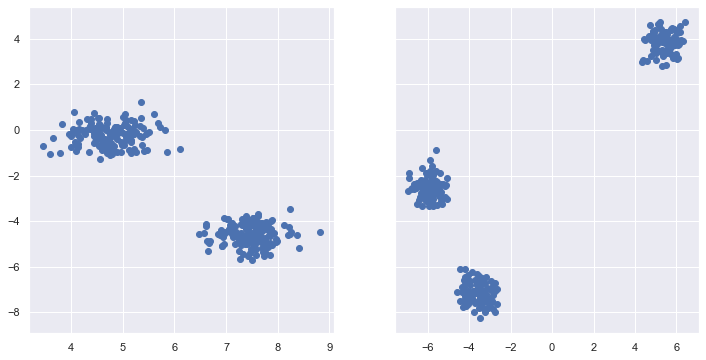

In [15]:
#Some more examples

fig, axes = plt.subplots(1,2, figsize = (12,6), sharey=True)
for ax, cluster in zip(axes,range(2,4)):
    data, cluster = make_blobs(n_samples=data_points, centers=cluster,cluster_std=cluster_std)
    ax.scatter(data[:,0],data[:,1])
plt.show()

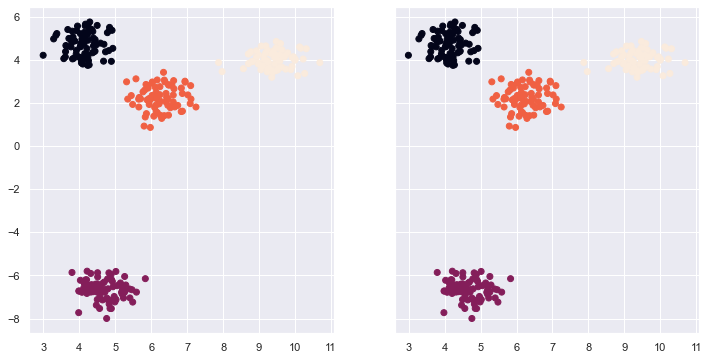

In [33]:
#K-means from sklearn can group data based on their proximity to each other.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=N_clusters) #Create clustering object with certain amount of clusters

N_clusters = 4
data_points = 300
cluster_std = .45

data, cluster_true = make_blobs(n_samples=data_points, centers=N_clusters,cluster_std=cluster_std)
kmeans.fit(data) #Update the object with the relevent data
clusters_kmeans = kmeans.predict(data) #generates an array with clustered units

#Note here that cluster is the "true" cluster the data points are definend to belong to and clusters_kmeans
#is the clusters the kmeans algorithym sorts the data points into.

#Relabel the assigned clusters to match the original
clusters_kmeans = np.abs(clusters_kmeans-cluster_true)+clusters_kmeans
clusters_kmeans = [x if x != 6 else 0 for x in clusters_kmeans]

clusters = [cluster_true, clusters_kmeans]

fig, axes = plt.subplots(1,2,figsize=(12,6), sharey=True)
for ax, cluster in zip(axes,clusters):
    ax.scatter(data[:, 0], data[:, 1], c=cluster)

plt.show()

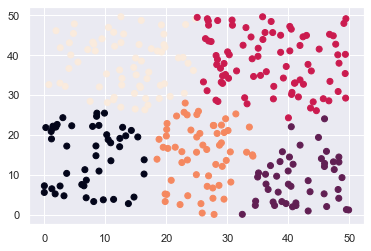

In [35]:
#Clustering on random datapoints
data = np.random.rand(300,2)*50
kmeans = KMeans(n_clusters = 5)
kmeans.fit(data)
clusters = kmeans.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=clusters)

# Caveats

1) May not be globally optimal
2) Can be slow for large amounts of data
3) Number of clusters must be chosen beforehand

# Example using image compression

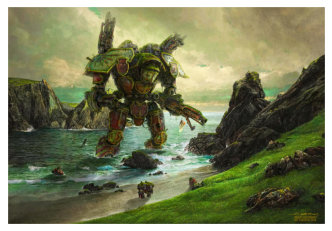

In [37]:
#Load in rbg image

titan = plt.imread("titan.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(titan);

In [41]:
titan.shape
#Here it shows the rbg value at every pixel, each of the rbg values can have a value of 255
#i.e thers around 16 million different colours. Most of which are identical.

(1094, 1600, 3)

In [42]:
#reshape the array and normalize it then for batching
data = titan.reshape(1094*1600,3)/255

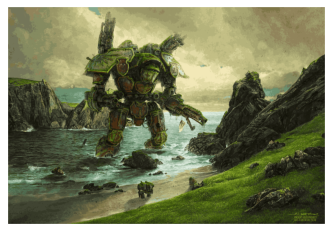

In [51]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(32) #Here we use 32 different colours
kmeans.fit(data)
new_titan = kmeans.cluster_centers_[kmeans.predict(data)] 
#There are 32 cluster centers, here we select a center based on the cluster. The size of the 
#array remains the original size but the rbg values can now only be one of 32 distinct ones.

#Note to self: Indexing a list with another list generates a new list with the size of the indexed list.

new_titan = new_titan.reshape(titan.shape)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(new_titan);

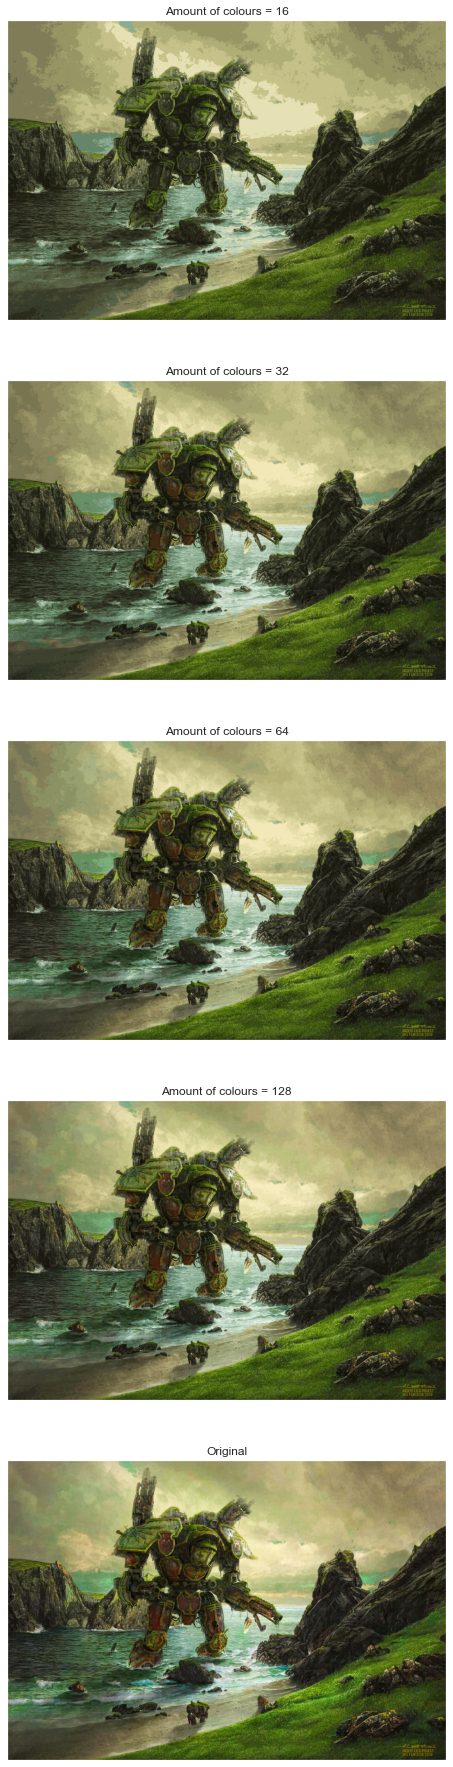

In [64]:
from sklearn.cluster import MiniBatchKMeans

fig, axes = plt.subplots(5, figsize=(18,32))
axes[-1].set(xticks = [], yticks = [], title = f'Original')
axes[-1].imshow(titan)
for ax, n_bit in zip(axes, [2**n for n in range(4,8)]):
    kmeans = MiniBatchKMeans(n_bit)
    kmeans.fit(data)
    new_titan = kmeans.cluster_centers_[kmeans.predict(data)]
    new_titan = new_titan.reshape(titan.shape)
    ax.set(xticks = [], yticks = [], title = f'Amount of colours = {n_bit}')
    ax.imshow(new_titan)

